In [0]:
from pyspark.sql.functions import when, col, avg, count
from pyspark.sql.window import Window 
import pyspark.sql.functions as func
import sys

In [0]:
%run ./Forecasting_Utils

In [0]:
kpm = KeyPackageModel()
kbm = KeyBrandModel()

In [0]:
print(kpm.states_list)
print(kpm.keys_list)

['AZ', 'CA', 'CO', 'ID', 'NE', 'NM', 'NV', 'OR', 'WA', 'WY']
['.5L 24PK BOTTLE', '.5L 6PK BOTTLE', '.5L SNG GLS BOTTLE', '1.25L SINGLE BOTTLE', '12OZ 12PK CAN', '12OZ 18PK CAN', '12OZ 20PK CAN', '12OZ 24PK CAN', '12OZ 24PK GLS BOTTLE', '12OZ 4PK GLS BOTTLE', '12OZ 6PK CAN', '12OZ 6PK GLASS BOTTLE', '12OZ 8PK PLS BOTTLE', '12OZ SNG GLS BOTTLE', '12OZ SNG SLEEK CAN', '16OZ SINGLE CAN', '1L SINGLE BOTTLE', '20OZ SINGLE BOTTLE', '24OZ 6PK BOTTLE', '24OZ SNG PLS BOTTLE', '2L SINGLE BOTTLE', '3L SINGLE BOTTLE', '7.5OZ 10PK CAN', '7.5OZ 6PK CAN', '8.5OZ ALUM BOTTLE', '8OZ 6PK GLASS BOTTLE', 'ALL OTHER PACKAGES']


In [0]:
print(kbm.states_list)
print(kbm.keys_list)

['AZ', 'CA', 'CO', 'ID', 'NE', 'NM', 'NV', 'OR', 'WA', 'WY']
['CHERRY COKE', 'CINNAMON COKE', 'COCA-COLA DREAMWORLD', 'COKE', 'COKE CF', 'COKE CHERRY VANILLA', 'COKE STARLIGHT', 'COKE W/LIME', 'DIET DR PEPPER', 'DIET DR PEPPER 10', 'DIET DR PEPPER CF', 'DIET DR PEPPER CHERRY', 'DIET DR PEPPER CHERRY VANILLA', 'DIET DR PEPPER CREAM SODA', 'DR PEPPER', 'DR PEPPER CF', 'DR PEPPER CHERRY', 'DR PEPPER CHERRY VANILLA', 'DR PEPPER CHERRY ZERO SUGAR', 'DR PEPPER CREAM SODA', 'DR PEPPER CREAM SODA ZERO SUGAR', 'DR PEPPER DARK BERRY', 'DR PEPPER ZERO SUGAR', 'HERITAGE DR PEPPER', "MARSHMELLO'S LIMITED EDITION COCA-COLA", 'MEXICAN COKE', 'ORANGE VANILLA COKE', 'REMAINING BRAND', 'VANILLA COKE']


In [0]:
for st in kbm.states_list:
    for br in kbm.keys_list:
        model_name = st + '_' + br 
        model_name = model_name.replace(" ", "_").replace(".", "_")
        

In [0]:
df_start = kbm.get_filtered_series('WA', 'COKE')
display(df_start)

state,key_brand,period_number,swire_period_date,avg_standard_physical_volume,dollar_promo_6wk,dollar_promo_8wk,dollar_promo_12wk
WA,COKE,1,2019-11-15,10.61,0.0,0.0,0.0
WA,COKE,2,2019-11-22,11.08,19.12,19.12,19.12
WA,COKE,3,2019-11-29,16.97,19.49,19.49,19.49
WA,COKE,4,2019-12-06,13.59,4.47,4.47,4.47
WA,COKE,5,2019-12-13,11.34,23.95,23.55,23.55
WA,COKE,6,2019-12-20,10.7,0.0,0.0,0.0
WA,COKE,7,2019-12-27,19.5,2.34,2.34,2.34
WA,COKE,8,2020-01-03,14.44,31.92,31.42,31.42
WA,COKE,9,2020-01-10,9.81,13.57,13.23,13.23
WA,COKE,10,2020-01-17,10.43,0.36,0.0,0.0


Output can only be rendered in Databricks

In [0]:
# Data processing
import pandas as pd
import numpy as np
from pyspark.sql.functions import log, col, exp
# Visulaization
import matplotlib.pyplot as plt
# Create synthetic dataset
from sklearn.datasets import make_regression
# Modeling
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
# MLflow
import mlflow
import mlflow.spark
from mlflow.tracking import MlflowClient

In [0]:
!pip install mlflow

     |██████▉

*** WARNING: max output size exceeded, skipping output. ***

     |████████████████████████████████| 34.6 MB 42.4 MB/s 
  Created wheel for databricks-cli: filename=databricks_cli-0.17.4-py3-none-any.whl size=142889 sha256=a4e19f8dafcdc426b68020eef90734e1bc65a94d6a21105e38cc05acd165decd
  Stored in directory: /root/.cache/pip/wheels/b3/d4/24/ed7f421c3c600f3eee1a3a9e5c4aecc286a7622cac031918b7
Successfully built databricks-cli
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Not uninstalling markupsafe at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-c993efeb-6ed9-46d0-ba5b-aa751a4147b3
    Can't uninstall 'MarkupSafe'. No files were found to uninstall.
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Not uninstalling jinja2 at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEn

In [0]:
!pip install databricks-cli

In [0]:
# Enable autolog()
# mlflow.sklearn.autolog() requires mlflow 1.11.0 or above.
mlflow.sklearn.autolog()
 
# With autolog() enabled, all model parameters, a model score, and the fitted model are automatically logged.  
with mlflow.start_run():
    
    # Set the model parameters. 
    n_estimators = 100
    max_depth = 6
    max_features = 3
    
    # Create and train model.
    rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
    rf.fit(X_train, y_train)
    
    # Use the model to make predictions on the test dataset.
    predictions = rf.predict(X_test)

2023/02/24 16:30:10 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/databricks/python/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils."


In [0]:
sdf = df_start
# Train test split
trainDF, testDF = sdf.randomSplit([.8, .2], seed=42)
# Print the number of records
print(f'There are {trainDF.cache().count()} records in the training dataset.')
print(f'There are {testDF.cache().count()} records in the testing dataset.')

There are 141 records in the training dataset.
There are 27 records in the testing dataset.


In [0]:
# Enable autolog()
# mlflow.sklearn.autolog() requires mlflow 1.11.0 or above.
mlflow.sklearn.autolog()
 
# With autolog() enabled, all model parameters, a model score, and the fitted model are automatically logged. 

In [0]:
dep_var = 'avg_standard_physical_volume'
indep_vars = ['dollar_promo_6wk', 'dollar_promo_8wk', 'dollar_promo_12wk']

for st in kbm.states_list:
    for br in kbm.keys_list:
        model_name = st + '_' + br 
        model_name = model_name.replace(" ", "_").replace(".", "_")
        

---------------------------------------------------------------------------
InvalidConfigurationError                 Traceback (most recent call last)
File <command-3247472379592594>:1
----> 1 with mlflow.start_run() as run:
      2       print('shg')

File /local_disk0/.ephemeral_nfs/envs/pythonEnv-b89aa12e-29b9-4d77-917d-586a4c7a6442/lib/python3.9/site-packages/mlflow/tracking/fluent.py:349, in start_run(run_id, experiment_id, run_name, nested, tags, description)
    345         user_specified_tags[MLFLOW_RUN_NAME] = run_name
    347     resolved_tags = context_registry.resolve_tags(user_specified_tags)
--> 349     active_run_obj = client.create_run(
    350         experiment_id=exp_id_for_run, tags=resolved_tags, run_name=run_name
    351     )
    353 _active_run_stack.append(ActiveRun(active_run_obj))
    354 return _active_run_stack[-1]

File /databricks/python_shell/dbruntime/MlflowAutologgingAdvice.py:79, in MlflowAutologgingAdviceHook.patch_create_run.<locals>.add_create_run

2023/02/24 16:32:03 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmphrmiudqx, flavor: spark), fall back to return ['pyspark==3.3.1']. Set logging level to DEBUG to see the full traceback.


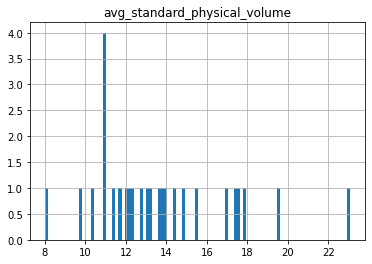

In [0]:

with mlflow.start_run(run_name="LR-Raw-Data") as run:
    # Define pipeline
    vecAssembler = VectorAssembler(inputCols=indep_vars, outputCol="features")
    lr = LinearRegression(featuresCol="features", labelCol=dep_var, predictionCol="prediction",elasticNetParam=0.5)
    pipeline = Pipeline(stages=[vecAssembler, lr])
    pipelineModel = pipeline.fit(trainDF)
    # Log parameters
    mlflow.log_param("target_variable", "dependent_variable")
    mlflow.log_param("elasticNetParam", 0.5)
    # Log the model for this run
    mlflow.spark.log_model(pipelineModel, "SparkML-linear-regression")
    # Make predictions
    predDF = pipelineModel.transform(testDF)    
    
#     # Save the prediction as csv
#     predDF.toPandas().to_csv('predictions.csv', index=False)
    
#     # Log the saved prediction as artifact
#     mlflow.log_artifact("predictions.csv")
    
    # Evaluate predictions
    regressionEvaluator = RegressionEvaluator(predictionCol="prediction", labelCol=dep_var)
    rmse = regressionEvaluator.setMetricName("rmse").evaluate(predDF)
    r2 = regressionEvaluator.setMetricName("r2").evaluate(predDF)
    mse = regressionEvaluator.setMetricName("mse").evaluate(predDF)
    mae = regressionEvaluator.setMetricName("mae").evaluate(predDF)
    
    # Log metrics
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)    
    mlflow.log_metric("mse", mse)    
    mlflow.log_metric("mae", mae)    
    # Create a plot for the testing dataset
    testDF.toPandas().hist(column=dep_var, bins=100)
    
    # Log artifact
    plt.savefig("dependent_variable.png")
    mlflow.log_artifact("dependent_variable.png")  